In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv("eegData.csv")
data.head()

,TimeStamp,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,...,Gyro_X,Gyro_Y,Gyro_Z,HeadBandOn,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10,Battery,Elements
0,2024-04-05 15:05:07.653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/event/connected Muse-FE6F
1,2024-04-05 15:05:07.693,0.981930,-0.076150,-0.221139,0.759982,1.011921,-0.265325,-0.253327,0.578459,0.889495,...,-0.299072,-1.465454,0.127106,1.0,1.0,1.0,1.0,1.0,60.0,NaN
2,2024-04-05 15:05:08.544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/blink
3,2024-04-05 15:05:08.704,0.943581,0.197182,0.393605,0.703747,1.140929,-0.127041,-0.063913,0.546102,0.924356,...,2.340240,-4.194489,-1.233673,1.0,1.0,1.0,1.0,1.0,60.0,NaN
4,2024-04-05 15:05:09.717,1.250908,-0.019755,0.479589,0.816751,1.320577,-0.152555,0.039184,0.543766,0.746104,...,-0.097198,-2.773895,-0.747681,1.0,1.0,1.0,1.0,1.0,60.0,NaN


In [3]:
data.info

<bound method DataFrame.info of                    TimeStamp  Delta_TP9  Delta_AF7  Delta_AF8  Delta_TP10  \
0    2024-04-05 15:05:07.653        NaN        NaN        NaN         NaN   
1    2024-04-05 15:05:07.693   0.981930  -0.076150  -0.221139    0.759982   
2    2024-04-05 15:05:08.544        NaN        NaN        NaN         NaN   
3    2024-04-05 15:05:08.704   0.943581   0.197182   0.393605    0.703747   
4    2024-04-05 15:05:09.717   1.250908  -0.019755   0.479589    0.816751   
..                       ...        ...        ...        ...         ...   
501  2024-04-05 15:11:07.357   1.361618   0.716974   0.971742    0.734043   
502  2024-04-05 15:11:08.370   1.109689  -0.133405   0.452620    0.672871   
503  2024-04-05 15:11:09.393   0.664608  -0.340853  -0.015592    0.558951   
504  2024-04-05 15:11:10.401   0.932263  -0.099512   0.039969    1.058938   
505  2024-04-05 15:11:11.430   0.995806  -0.157447   0.193755    1.170263   

     Theta_TP9  Theta_AF7  Theta_AF8  Theta

In [4]:
data = data.drop(['AUX_RIGHT', 'Accelerometer_X'	,'Accelerometer_Y',	'Accelerometer_Z',	'Gyro_X',	'Gyro_Y',	'Gyro_Z',	'HeadBandOn',	'HSI_TP9',	'HSI_AF7',	'HSI_AF8',	'HSI_TP10'	,'Battery'	,'Elements'], axis=1)


In [5]:
ndata = data.dropna()
ndata


,TimeStamp,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,...,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF7,Gamma_AF8,Gamma_TP10,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10
1,2024-04-05 15:05:07.693,0.981930,-0.076150,-0.221139,0.759982,1.011921,-0.265325,-0.253327,0.578459,0.889495,...,0.134556,0.102228,-0.261286,-0.598613,-0.175106,-0.142913,760.73260,795.38464,780.87915,736.95970
3,2024-04-05 15:05:08.704,0.943581,0.197182,0.393605,0.703747,1.140929,-0.127041,-0.063913,0.546102,0.924356,...,0.079607,0.167576,-0.091571,-0.594486,-0.263411,-0.270577,736.55676,780.47620,774.02930,747.43590
4,2024-04-05 15:05:09.717,1.250908,-0.019755,0.479589,0.816751,1.320577,-0.152555,0.039184,0.543766,0.746104,...,0.009925,0.348676,-0.187884,-0.469776,-0.528951,-0.324629,714.79850,788.53480,771.61170,754.68866
5,2024-04-05 15:05:10.720,1.244069,0.182018,0.347410,0.491995,0.969621,-0.119236,0.153673,0.480762,0.785856,...,0.106522,0.212835,-0.055654,-0.504993,-0.264707,-0.179133,746.22710,808.68134,760.32965,771.20880
7,2024-04-05 15:05:11.729,1.330172,0.442844,0.371903,0.468577,1.017227,0.040836,0.252068,0.495763,0.768125,...,0.083008,0.196376,0.060811,-0.481107,-0.306532,-0.187552,757.50916,761.94140,775.64105,762.74725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2024-04-05 15:11:07.357,1.361618,0.716974,0.971742,0.734043,0.715199,0.374889,0.447459,0.362731,0.865209,...,0.179040,0.268585,-0.206326,-0.485833,-0.090811,0.174845,787.32600,789.74360,805.05493,807.47253
502,2024-04-05 15:11:08.370,1.109689,-0.133405,0.452620,0.672871,0.924800,-0.101046,0.213632,0.220998,0.925950,...,0.042070,0.201452,-0.141378,-0.301435,-0.135535,-0.045338,770.80585,792.56410,785.31134,779.26740
503,2024-04-05 15:11:09.393,0.664608,-0.340853,-0.015592,0.558951,0.211294,-0.319167,0.064269,0.370084,0.603968,...,0.120741,0.544413,-0.073056,-0.447923,-0.185652,-0.072602,776.44690,798.60803,797.39930,773.62640
504,2024-04-05 15:11:10.401,0.932263,-0.099512,0.039969,1.058938,0.373047,-0.339309,-0.310689,0.652280,0.619961,...,0.249771,0.467882,0.049742,-0.393900,-0.210984,-0.095207,781.68500,798.20514,811.09890,811.09890


In [6]:
from scipy.signal import find_peaks


In [7]:
%matplotlib inline 

In [8]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

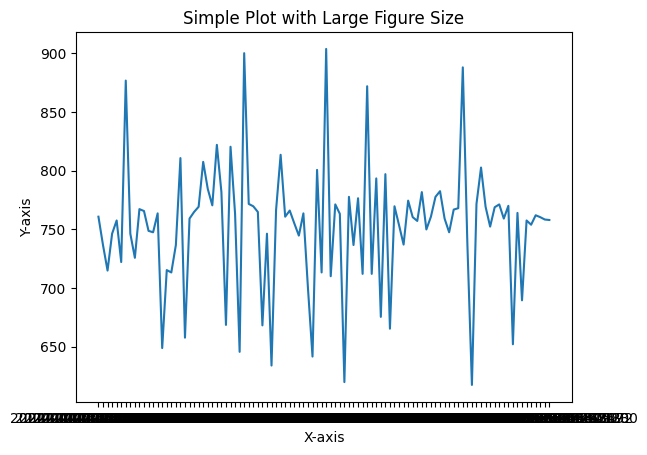

In [9]:

x = ndata['TimeStamp'].values[:100]
y = ndata['RAW_TP9'].values[:100]
plt.plot(x, y)
plt.title('Simple Plot with Large Figure Size')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show the plot
plt.show()


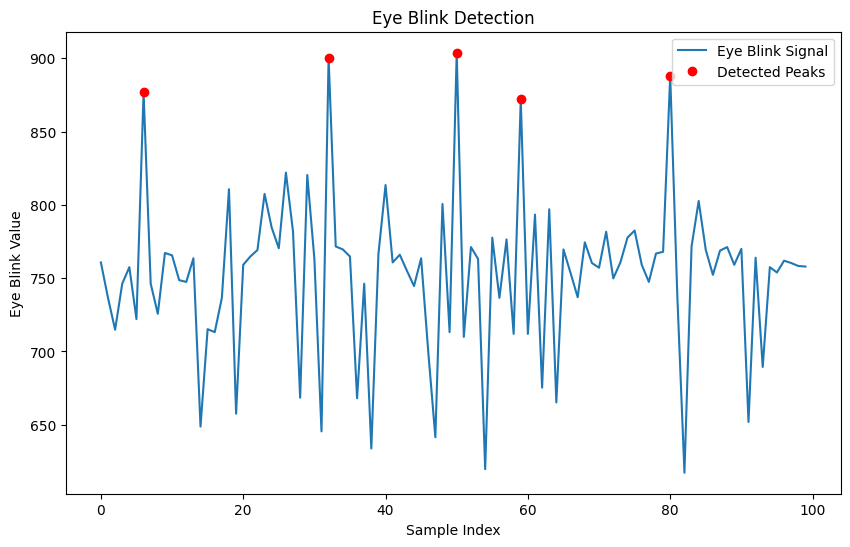

In [10]:
peaks, _ = find_peaks(y, height=850)  # Adjust the threshold as needed

# Plot the eye blink signal and detected peaks
plt.figure(figsize=(10, 6))
plt.plot(y, label="Eye Blink Signal")
plt.plot(peaks, y[peaks], "ro", label="Detected Peaks")
plt.xlabel("Sample Index")
plt.ylabel("Eye Blink Value")
plt.title("Eye Blink Detection")
plt.legend()
plt.show()


In [11]:
y = -1 * y 
y 

array([-760.7326 , -736.55676, -714.7985 , -746.2271 , -757.50916,
       -722.0513 , -876.77655, -746.2271 , -725.6777 , -767.1795 ,
       -765.56775, -748.6447 , -747.4359 , -763.5531 , -648.71796,
       -715.2015 , -713.1868 , -736.55676, -810.696  , -657.5824 ,
       -759.12085, -764.7619 , -769.19415, -807.47253, -784.5055 ,
       -770.40295, -821.978  , -781.685  , -668.46155, -820.3663 ,
       -763.1502 , -645.4945 , -900.14655, -771.6117 , -769.59705,
       -764.7619 , -668.0586 , -746.2271 , -633.8095 , -766.3736 ,
       -813.5165 , -760.7326 , -765.9707 , -755.09155, -744.61536,
       -763.5531 , -699.89014, -641.4652 , -800.6227 , -713.1868 ,
       -903.7729 , -709.9634 , -771.2088 , -763.1502 , -619.707  ,
       -777.6557 , -736.55676, -776.4469 , -711.978  , -871.9414 ,
       -711.978  , -793.36993, -675.31134, -796.99634, -665.2381 ,
       -769.59705, -753.47986, -736.9597 , -774.43225, -760.32965,
       -757.1062 , -781.685  , -749.85345, -760.7326 , -777.65

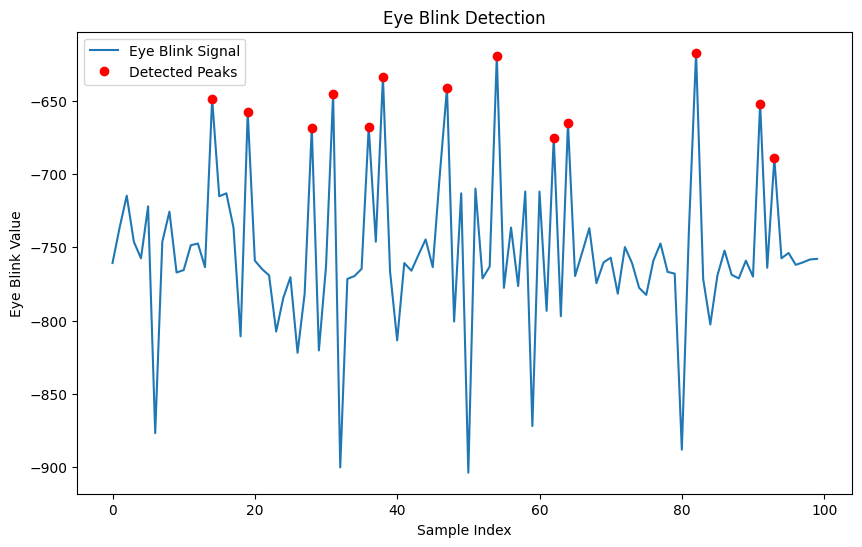

In [12]:
peaks, _ = find_peaks(y, height=-700)  # Adjust the threshold as needed

# Plot the eye blink signal and detected peaks
plt.figure(figsize=(10, 6))
plt.plot(y, label="Eye Blink Signal")
plt.plot(peaks, y[peaks], "ro", label="Detected Peaks")
plt.xlabel("Sample Index")
plt.ylabel("Eye Blink Value")
plt.title("Eye Blink Detection")
plt.legend()
plt.show()


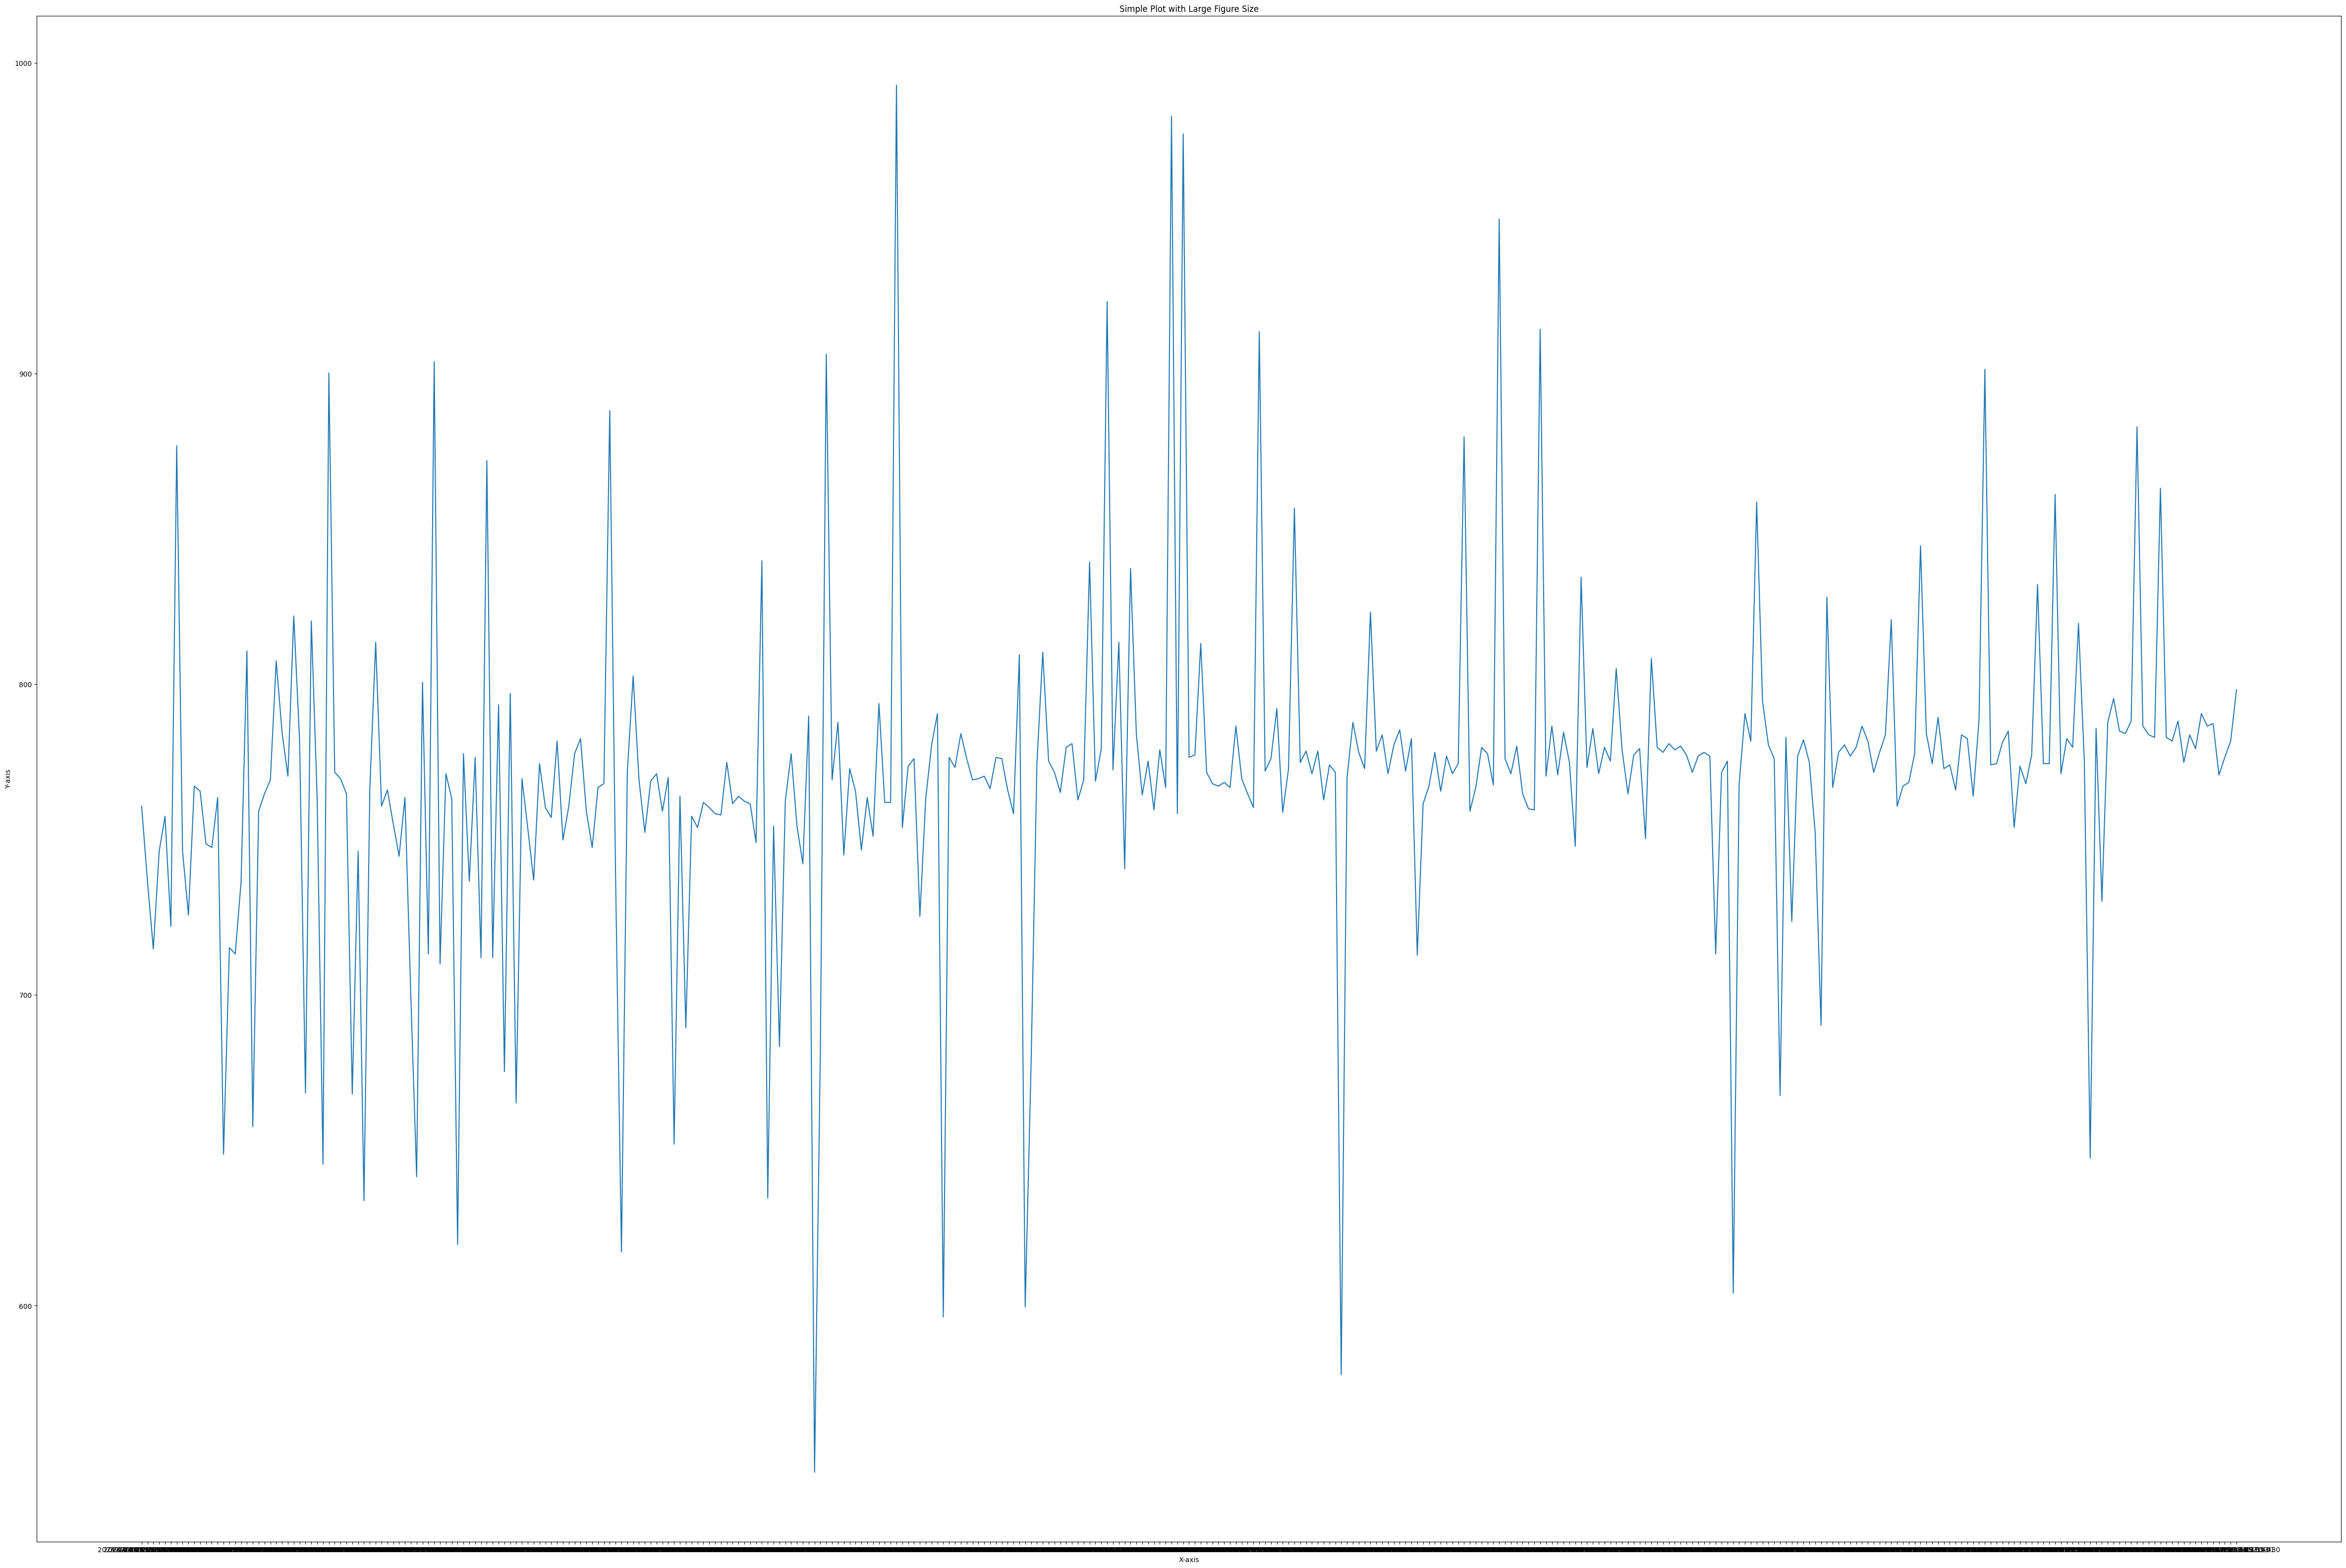

In [13]:
plt.figure(figsize=(60, 40))

x = ndata['TimeStamp']
y = ndata['RAW_TP9']
plt.plot(x, y)
plt.title('Simple Plot with Large Figure Size')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show the plot
plt.show()


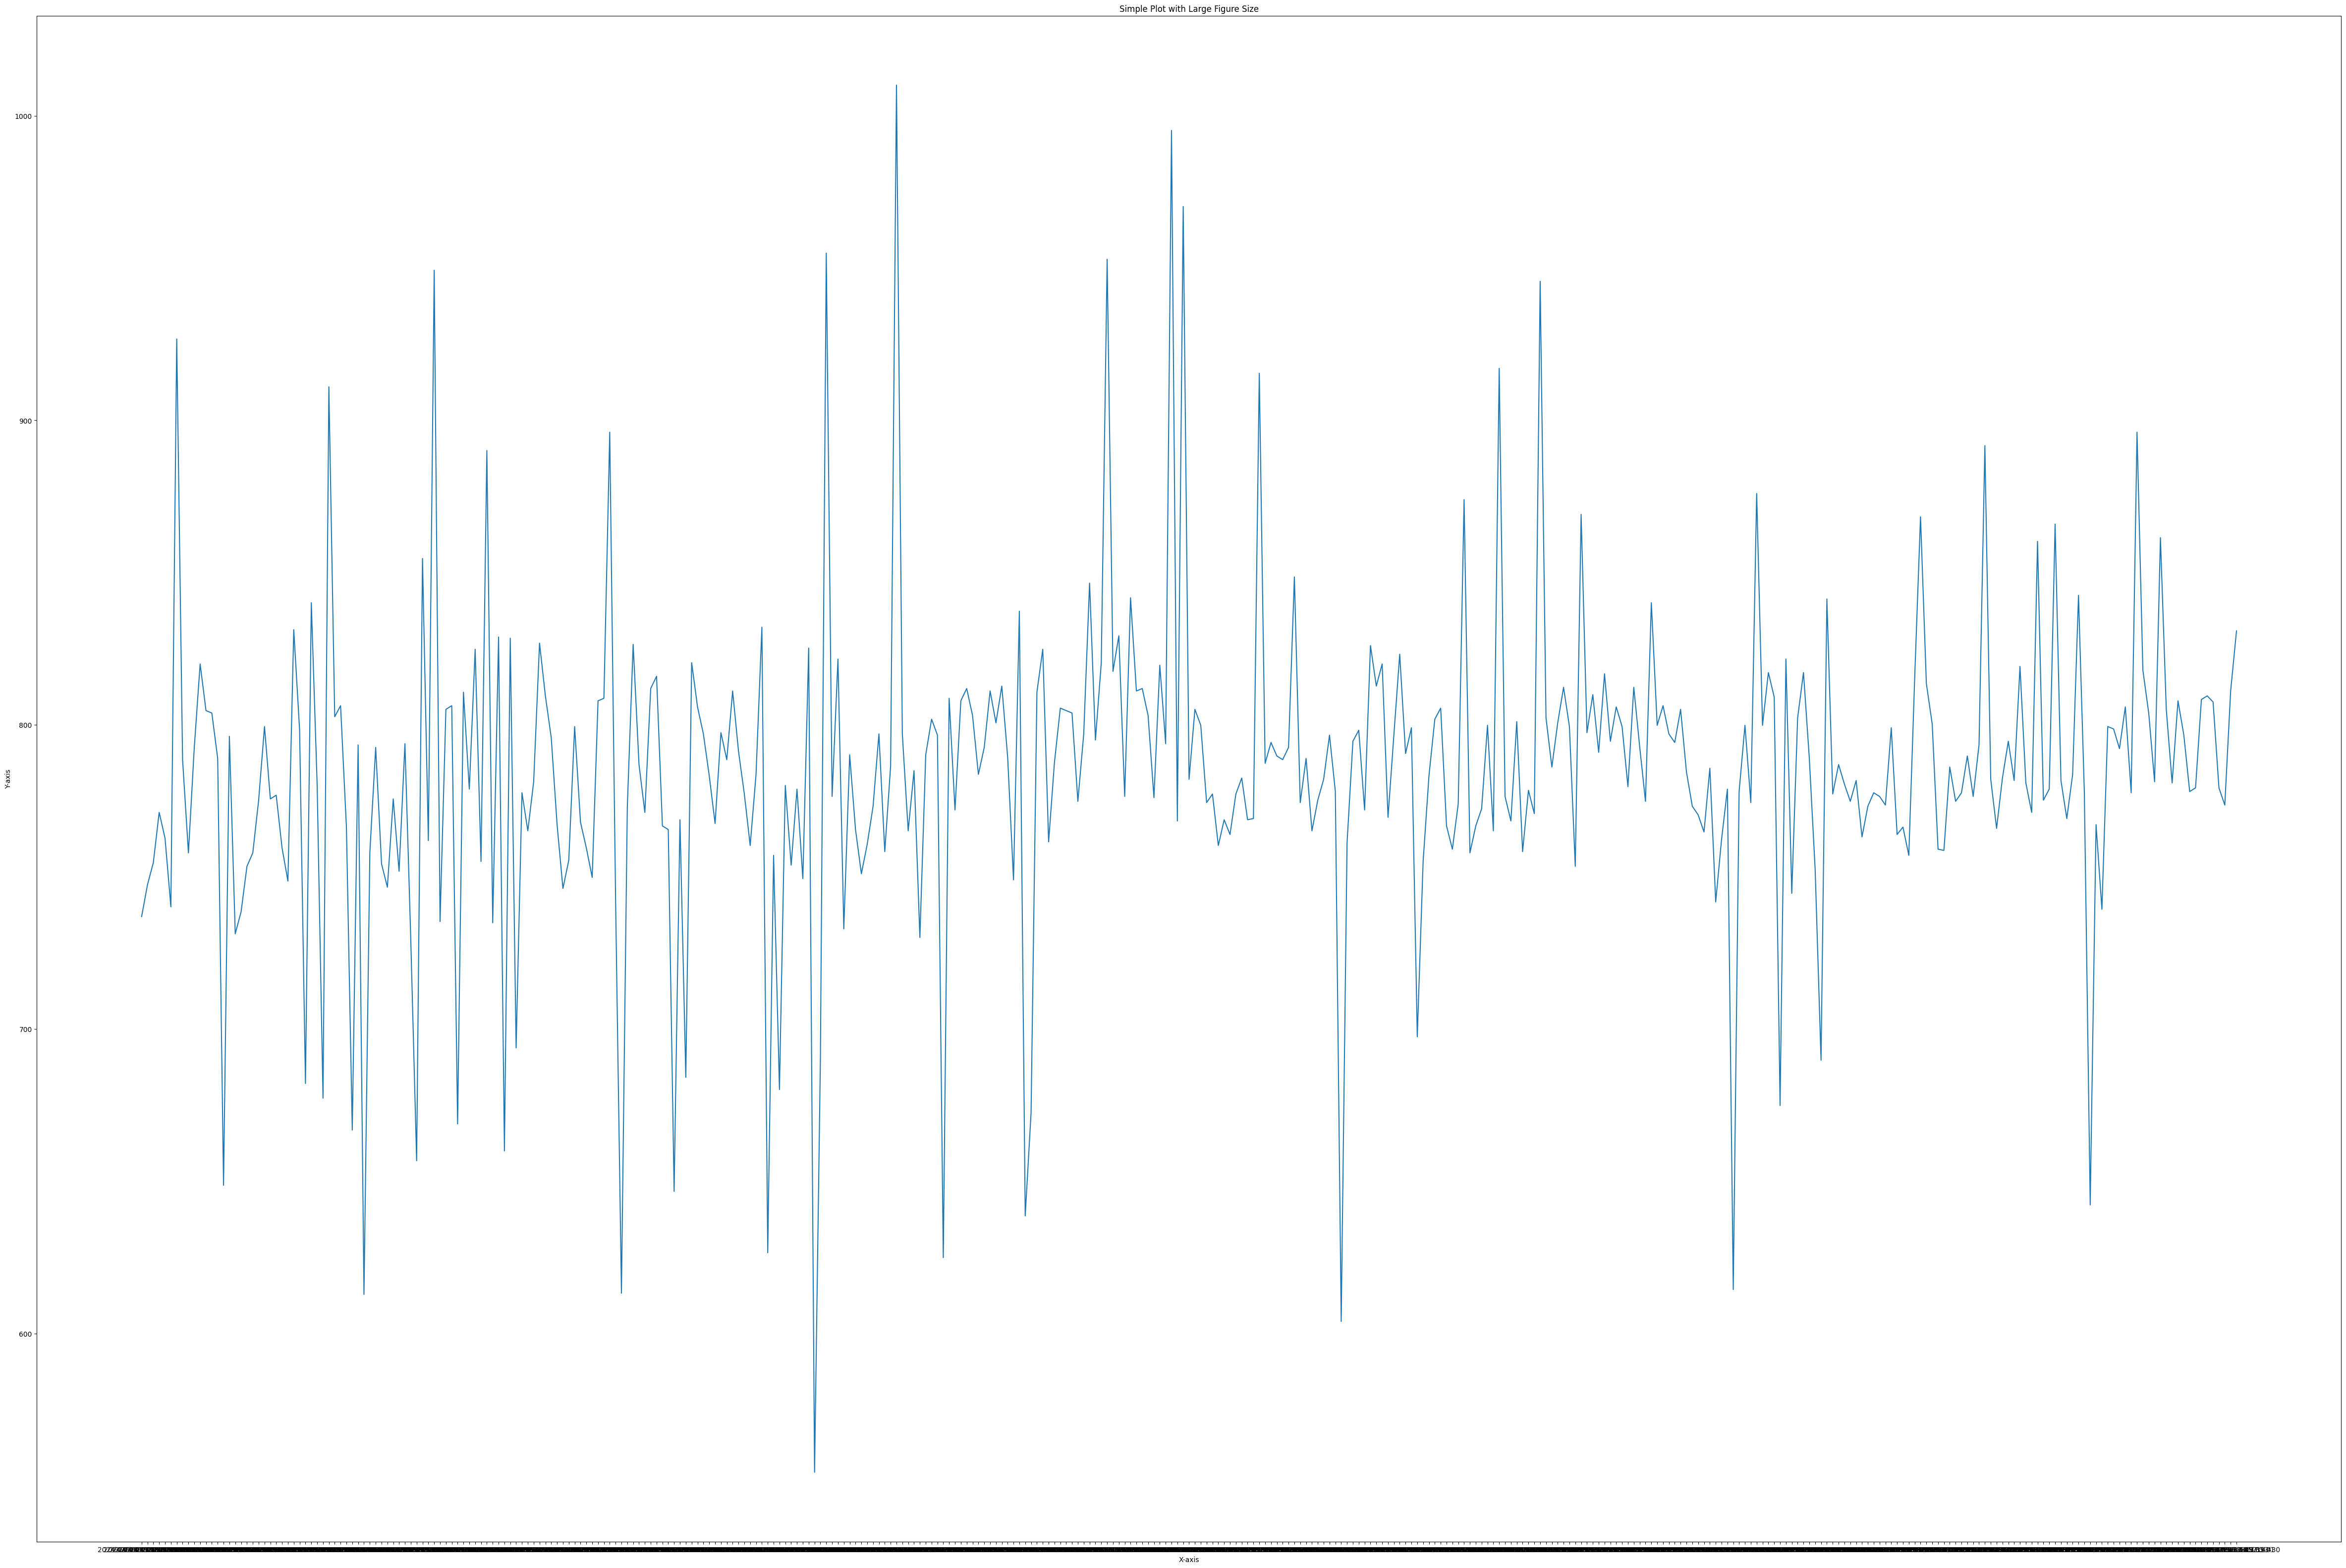

In [14]:
plt.figure(figsize=(60, 40))

plt.plot(ndata['TimeStamp'], ndata['RAW_TP10'])
plt.title('Simple Plot with Large Figure Size')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show the plot
plt.show()


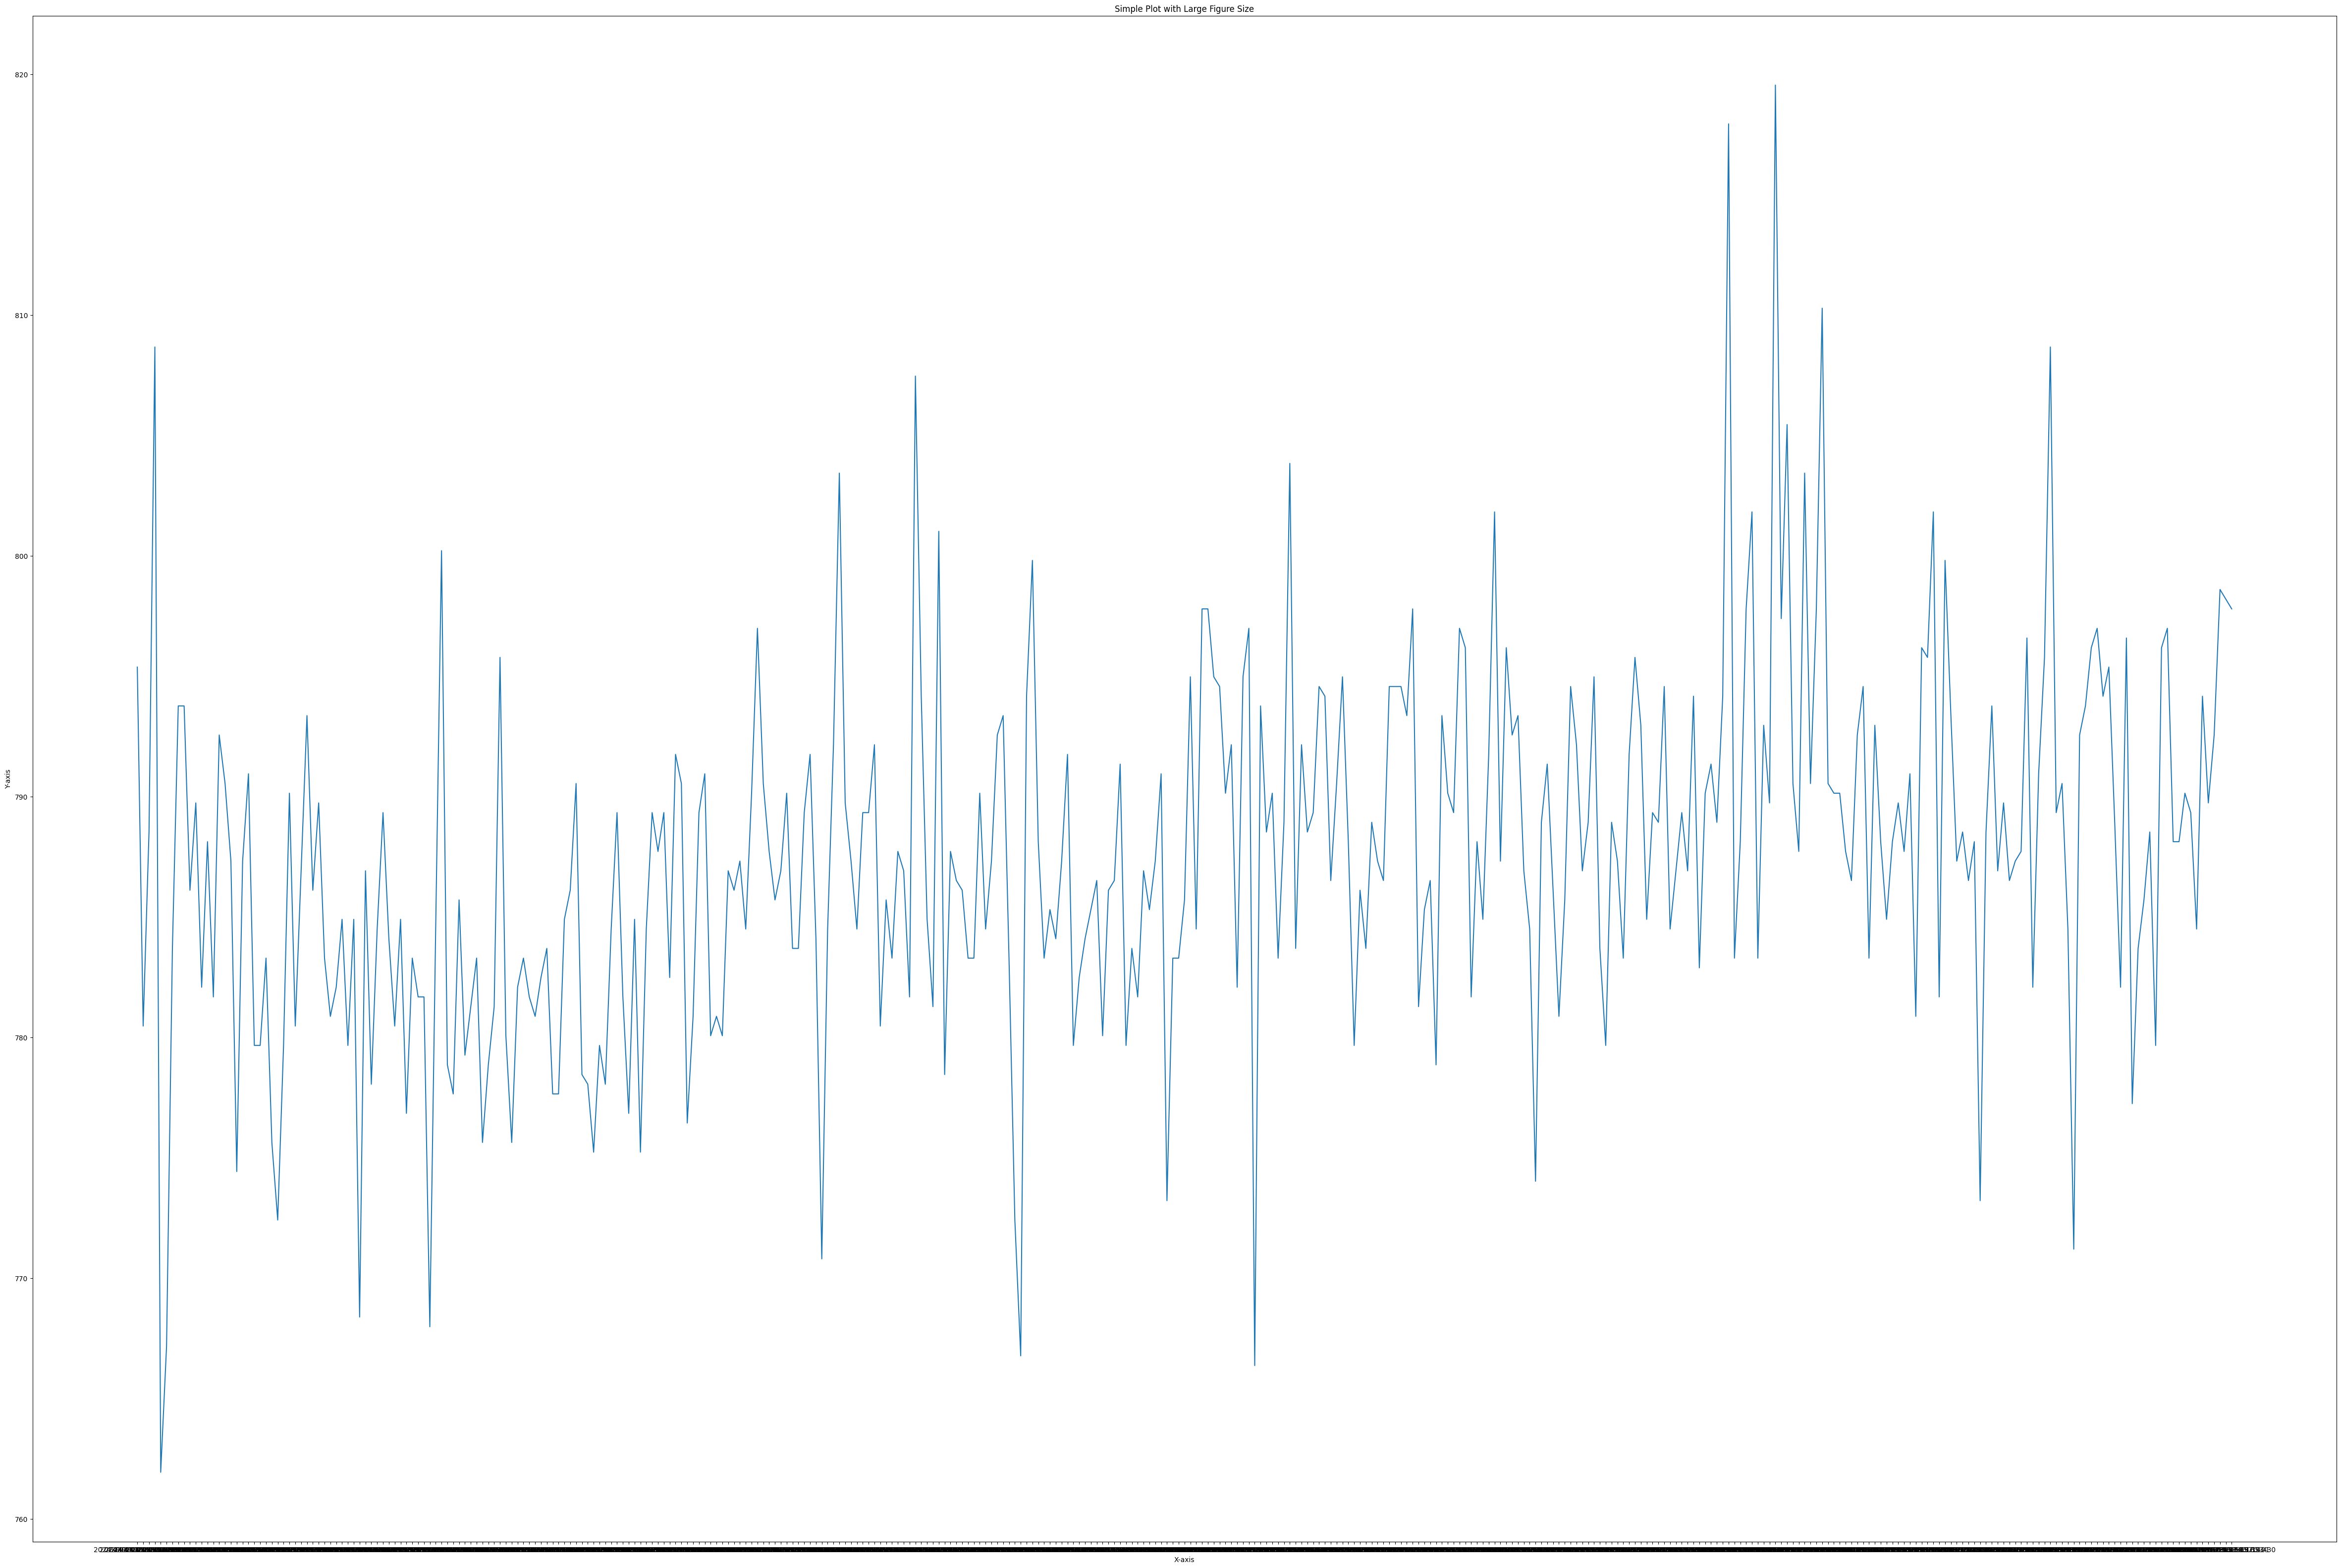

In [15]:
plt.figure(figsize=(60, 40))

plt.plot(ndata['TimeStamp'], ndata['RAW_AF7'])
plt.title('Simple Plot with Large Figure Size')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show the plot
plt.show()


In [17]:
dat = pd.read_csv("muselab_recording.csv")
data = dat[['timestamps',	'eeg_1',	'eeg_2'	,'eeg_3',	'eeg_4']]
data

,timestamps,eeg_1,eeg_2,eeg_3,eeg_4
0,1.712325e+09,NaN,NaN,NaN,NaN
1,1.712325e+09,NaN,NaN,NaN,NaN
2,1.712325e+09,NaN,NaN,NaN,NaN
3,1.712325e+09,1104.43230,819.56040,803.84610,805.8608
4,1.712325e+09,1590.76930,813.91943,805.45790,840.9158
...,...,...,...,...,...
31010,1.712325e+09,684.57874,792.96704,802.23444,783.2967
31011,1.712325e+09,NaN,NaN,NaN,NaN
31012,1.712325e+09,1343.77300,883.22345,810.29300,824.3956
31013,1.712325e+09,1259.15750,820.76920,807.87550,826.8132


In [18]:
dat.columns

Index(['timestamps', 'eeg_1', 'eeg_2', 'eeg_3', 'eeg_4', 'eeg_5', 'eeg_6',
       'acc_1', 'acc_2', 'acc_3', 'drlref_1', 'drlref_2', 'note', 'ppg_1',
       'ppg_2', 'ppg_3'],
      dtype='object')

In [ ]:
data.isnull().sum()

timestamps        0
eeg_1         12979
eeg_2         12979
eeg_3         12979
eeg_4         12979
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data


,timestamps,eeg_1,eeg_2,eeg_3,eeg_4
3,1.712325e+09,1104.43230,819.56040,803.84610,805.86080
4,1.712325e+09,1590.76930,813.91943,805.45790,840.91580
5,1.712325e+09,911.02563,805.86080,805.45790,794.98170
6,1.712325e+09,133.77289,814.72530,807.47253,741.79486
7,1.712325e+09,204.28572,803.44324,807.06960,747.43590
...,...,...,...,...,...
31008,1.712325e+09,460.14650,791.75824,800.21980,772.82050
31009,1.712325e+09,224.02930,715.20150,798.20514,755.09155
31010,1.712325e+09,684.57874,792.96704,802.23444,783.29670
31012,1.712325e+09,1343.77300,883.22345,810.29300,824.39560


In [ ]:
x = data['timestamps'].values[0:256]
y = data['eeg_1'].values[0:256]

print(data['timestamps'].values[100:100])
# plt.plot(x, y)
# plt.title('Simple Plot with Large Figure Size')
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')

# # Show the plot
# plt.show()

# first_point = 0 
# second_point = 256 

# while( second_point<18036):
#     x = data['timestamps'].values[first_point:second_point]
#     y = data['eeg_1'].values[first_point:second_point]
#     plt.plot(x, y)
#     plt.title('Simple Plot with Large Figure Size')
#     plt.xlabel('X-axis')
#     plt.ylabel('Y-axis')

#     # Show the plot
#     first_point = second_point
#     second_point += 256
#     plt.pause(100)
    




[]
